# 1. Setup and Data Loading

In [2]:
# Libraries
#processing & manipulation
import pandas as pd 
import numpy as np

 #visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Datasets into Panda Dataframes
vendor_purchase_prices = pd.read_csv('Vendor_Purchase_Prices_Dec_2017.csv')
beginning_inventory = pd.read_csv('Beginning_Inventory_Dec_31_2016.csv')
ending_inventory = pd.read_csv('Ending_Inventory_Dec_31_2016.csv')
invoice_purchases = pd.read_csv('Invoice_Purchases_Dec_31_2016.csv')
purchases = pd.read_csv('Purchases_Dec_31_2016.csv')
sales = pd.read_csv('Sales_Dec_31_2016.csv')

In [4]:
# Checking columns in the datasets
print("vendor_purchase_prices Columns")
print(vendor_purchase_prices.columns.tolist())

print("\nbeginning_inventory Columns")
print(beginning_inventory.columns.tolist())

print("\nending_inventory Columns")
print(ending_inventory.columns.tolist())

print("\ninvoice_purchases Columns")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns")
print(purchases.columns.tolist())

print("\nsales Columns")
print(sales.columns.tolist())

vendor_purchase_prices Columns
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beginning_inventory Columns
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

ending_inventory Columns
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


# 2. Getting overview of the data using ChatGPT

Based on the provided datasets and their columns, here's a summary of each dataset and the potential relationships between them:

1. vendor_purchase_prices
Columns: ['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']
Summary: This dataset contains information about the purchase prices set by vendors for different products. It includes details about the brand, product description, size, and purchase price, along with the vendor information.

3. beginning_inventory
Columns: ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']
Summary: This dataset represents the inventory at the beginning of a certain period. It includes information about the quantity of products on hand, the store location, and the start date of the inventory period.

4. ending_inventory
Columns: ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']
Summary: Similar to the beginning inventory, this dataset shows the inventory levels at the end of a certain period. It tracks the changes in inventory over time by comparing it with the beginning inventory.

5. invoice_purchases
Columns: ['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']
Summary: This dataset contains records of purchases made from vendors, including invoice details, purchase order numbers, payment dates, and the quantities purchased. It provides insight into the purchasing activities and the financial transactions with vendors.

6. purchases
Columns: ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']
Summary: This dataset provides detailed information about the products purchased, including inventory IDs, vendor details, purchase order numbers, and pricing. It links inventory items to their respective purchases.

7. sales
Columns: ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']

Summary: This dataset captures the sales transactions, including the quantity sold, sales revenue, and sales prices. It also contains vendor information, which can help in analyzing the relationship between purchases and sales.

Potential Relationships Between the Datasets:

vendor_purchase_prices & purchases:
Relationship: Match on VendorNumber, VendorName, Brand, Description, and Size.
Purpose: To verify that the purchase prices in the purchases dataset align with the vendor's listed prices in the vendor_purchase_prices dataset.

beginning_inventory & ending_inventory:
Relationship: Match on InventoryId, Store, Brand, Description, and Size.
Purpose: To track inventory changes over time by comparing the quantities in the beginning and ending inventories.

purchases & invoice_purchases:
Relationship: Match on VendorNumber, VendorName, PONumber, and InvoiceDate.
Purpose: To ensure that the quantities and dollars in the purchases dataset are consistent with the invoice records in invoice_purchases.

purchases & sales:
Relationship: Match on InventoryId, Store, Brand, Description, and Size.
Purpose: To analyze the relationship between what was purchased and what was sold, including sales performance, margins, and inventory turnover.

vendor_purchase_prices & sales:
Relationship: Match on VendorNo, VendorName, Brand, Description, and Size.
Purpose: To analyze how the prices set by vendors affect sales performance and profitability.

By understanding these relationships, you can conduct comprehensive analyses such as inventory management, profitability analysis, vendor performance evaluation, and more.


# 3. Alternatively can give chatgpt the files with few rows to get a better overview

# Datasets and file path.
datasets = {'vendor_purchase_prices':'Vendor_Purchase_Prices_Dec_2017.csv',
'beginning_inventory':'Beginning_Inventory_Dec_31_2016.csv',
'ending_inventory':'Ending_Inventory_Dec_31_2016.csv',
'invoice_purchases':'Invoice_Purchases_Dec_31_2016.csv',
'purchases':'Purchases_Dec_31_2016.csv',
'sales':'Sales_Dec_31_2016.csv'}

# Max size in MB
max_size_mb = 15

# Function to iteratively reduce the dataset size
def iterativelt_reduce(df, target_size_mb, file_name): current_size_mb = df.memory_usage(deep=True).sum()/1024 ** 2 rows = len(df)

    # continue trimming while dataset is larger then target size
    while current_size_mb > target_size_mb and rows > 0:
        # reduce the number of rows by 10% each iteration (adjust as needed)
        rows = int(rows * 0.9)
        current_size_mb = df.head(rows).memory_usage(deep=True).sum()/1024 ** 2

    # save the trimmed DataFrame
    trimmed_df = df.head(rows)
    trimmed_df.to_csv(f'trimmed_{file_name}.csv', index=False)
    return trimmed_df, current_size_mb

    # Apply the iterative reduction to each dataset and save the results
    for name, path in datasets.items(): # Load the dataset df = pd.read_csv(path)

        # Iteratively reduce the size and save the trimmed dataset
        trimmed_df, actual_size_mb = iteratively_reduce(df, max_size_mb, name)

        # Print the status
        print(f"{name}: Reduce to rows: {len(trimmed_df)}, Actual size after trimming: {actual_size_mb:.2f} MB. Saved as 'trimmed_{name}.csv'")

    


# 3. Data Cleaning

In [8]:
# Function to check and report missing values
def check_missing_values(df, df_name):
    print(f"\nMissing values in {df_name}:")
    missing_values = df.isnull().sum() # sum of missing values in each columns
    missing_values = missing_values[missing_values > 0] # filter out columns with no missing values
    if missing_values.empty:
        print("No missing values found")
    else:
        print(missing_values)

# Applying the Function to each dataset and Reporting
datasets = {
    'Vendor Purchase Prices': vendor_purchase_prices,
    'Beginning Inventory': beginning_inventory,
    'Ending Inventory': ending_inventory,
    'Invoice Purchases': invoice_purchases,
    'Purchases': purchases,
    'Sales': sales
}

# Loop through datasets dictionary
for name, dataset in datasets.items():
        check_missing_values(dataset, name)


Missing values in Vendor Purchase Prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in Beginning Inventory:
No missing values found

Missing values in Ending Inventory:
City    1284
dtype: int64

Missing values in Invoice Purchases:
Approval    5169
dtype: int64

Missing values in Purchases:
Size    3
dtype: int64

Missing values in Sales:
No missing values found


In [9]:
# Store does not have missing values so we can try to get 'city' from 'Store'. See if we can use the store column to infer the city

# Filter the dataset to only rows with missing 'City' values
missing_city = ending_inventory[ending_inventory['City'].isnull()]


# Group by 'Store' and count the occurences of missing 'City' values. 
# Group everything by Store and then do the count of missing cities by store
# reset_index of the dataframe and rename column name as 'Missing City Count'
missing_city_grouped = missing_city.groupby('Store').size().reset_index(name='Missing City Count')

# Sort the results for better readibility
missing_city_grouped_sorted = missing_city_grouped.sort_values(by='Missing City Count', ascending=False)

#Print the grouped data
print("Grouped data by Store for missing City values:")
print(missing_city_grouped_sorted)

# After running shows that all 1248 'Missing City Count' are related to 'Store' 46
# 46 doesn't give a location. 46 is like an identifier

Grouped data by Store for missing City values:
   Store  Missing City Count
0     46                1284


In [10]:
# See what are the values for the 'Approval' column in 'invoice_purchases' dataset
# Get the distinct values of the 'Approval' column to see what's in it
distinct_approval_values = invoice_purchases['Approval'].unique()

# Print the distinct values
print("Distinct values in the 'Approval' column:")
print(distinct_approval_values)

# After running shows the nan, and the person who did the approvals

Distinct values in the 'Approval' column:
[nan 'Frank Delahunt']


In [11]:
# Handling Missing Values

# Vendor Purchase Prices
# Action Summary: Removing rows with missing values in 'Description' 'Size', and 'Volume', as it is less.
vendor_purchase_prices.dropna(subset=['Description', 'Size', 'Volume'], inplace=True)

# Ending Inventory
# Action Summary: Replacing missing 'City' values with 'Unknown'. Replace with text 'Unknown'
ending_inventory['City'].fillna('Unknown', inplace=True)

# Purchases
# Action Summary: Removing rows with missing values in 'Size', as it is less.
purchases.dropna(subset=['Size'], inplace=True)

# Print the summary of missing values after handling them. Redo the check
datasets = {
    'Vendor Purchase Prices': vendor_purchase_prices,
    'Beginning Inventory': beginning_inventory,
    'Ending Inventory': ending_inventory,
    'Invoice Purchases': invoice_purchases,
    'Purchases': purchases,
    'Sales': sales
}

for name, dataset in datasets.items():
    print(f"\nMissing values in {name} after handling:")
    missing_values = dataset.isnull().sum()[dataset.isnull().sum() > 0]
    if  missing_values.empty:
        print("No missing values.")
    else:
        print(missing_values)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13072\2147461279.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ending_inventory['City'].fillna('Unknown', inplace=True)



Missing values in Vendor Purchase Prices after handling:
No missing values.

Missing values in Beginning Inventory after handling:
No missing values.

Missing values in Ending Inventory after handling:
No missing values.

Missing values in Invoice Purchases after handling:
Approval    5169
dtype: int64

Missing values in Purchases after handling:
No missing values.

Missing values in Sales after handling:
No missing values.


# 4. Consolidating datasets
As have 6 disctinct datasets, so it's best to bring them together in one dataset

In [13]:
# Summary statists for numerical columns
numerical_summary = beginning_inventory[['onHand', 'Price']].describe()

# Output the results
print("Numerical Summary:\n", numerical_summary)

#min will show the minimum items for 1 specific inventory

Numerical Summary:
               onHand          Price
count  206529.000000  206529.000000
mean       20.429455      22.253910
std        31.467342      70.178964
min         0.000000       0.000000
25%         7.000000       9.990000
50%        12.000000      14.990000
75%        21.000000      21.990000
max      1251.000000   13999.900000


In [14]:
# Check during the year what items were purchased and items we sold

# Summarize total purchases for each item
# Can have multiple purchases for the same item in different months (inventory ID), should be grouped to see summary together
# Perform sum of the Quanity column
total_purchases = purchases.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity': 'TotalPurchased'}, inplace=True)

# Summarize total sales for each item
# Perform sum of the SalesQuantity
total_sales = sales.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
total_sales.rename(columns={'SalesQuantity': 'TotalSold'}, inplace=True)



In [15]:
# Merging Beginning and Ending Inventory and then adding total_purchases and total_sales

#Merge Beginning and Ending Inventory
# Can have case where item completely sold and not in ending inventory, which is aceptable
# Outer join allows if item was not in beginning but bought in at the end.  Gives full list of inventory
inventory = pd.merge(beginning_inventory, ending_inventory,
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'], #Specified the common columns in betweent the 2
                     how='outer', #Outer join
                     suffixes=('_beg', '_end')) #Add suffix wrt to the inventory

# Merge Summarized Purchases
# Doing left join, because want to see ourchases of items in begginning or ending
# Item A, is not present in beginning and end. Hence, should not be considered. Can assume Item A, was bought in the Period and sold immediately
inventory = pd.merge(inventory, total_purchases, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'],
                     how='left')

# Merge Summarize Sales
# Only those sales items that are in the beginning or ending inventory
inventory = pd.merge(inventory, total_sales, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'],
                     how='left')

In [16]:
# Cleaning the final consolidated file

#Fill NaN values with 0 for TotalPurchased and TotalSold
inventory['TotalPurchased'].fillna(0, inplace=True)
inventory['TotalSold'].fillna(0, inplace=True)
#inventory['onHand_end'].fillna(0, inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13072\557107408.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inventory['TotalPurchased'].fillna(0, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13072\557107408.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [17]:
# Check if communication of datasets was done accurately.
# Total onHand qty items in beggining == total of onHand in merged file

# Calculate the total 'onHand' for the original Beginning Inventory
total_beg_inv_original = beginning_inventory['onHand'].sum()

# Calculate the total 'onHand_beg' for the merged DateFrame
total_beg_inv_merged = inventory['onHand_beg'].sum()

# Calculate the total 'onHand' for the original Ending Inventory
total_end_inv_original = ending_inventory['onHand'].sum()

# Calculate the total 'onHand_end' for the merged DateFrame
total_end_inv_merged = inventory['onHand_end'].sum()

In [18]:
# Print the results for the beginning inventory comparison
print("Total beginning inventory in the original 'Beginning Inventory' table:", total_beg_inv_original)
print("Total beginning inventory in the mergerd 'inventory' table:", total_beg_inv_merged)

# Check if the totals match for beginning inventory
if total_beg_inv_original == total_beg_inv_merged:
    print("The total beginning inventory matches between the original and the merged tables.")
else:
    print("The total beginning inventory does NOT match between the original and the merged tables. Please investigate.")

# Print the results for the ending inventory comparison
print("\nTotal ending inventory in the original 'Ending Inventory' table:", total_end_inv_original)
print("Total ending inventory in the merged 'inventory' table:", total_end_inv_merged)

# Check if the totals match for beginning inventory
if total_end_inv_original == total_end_inv_merged:
    print("The total ending inventory matches between the original and the merged tables.")
else:
    print("The total ending inventory does NOT match between the original and the merged tables. Please investigate.")

Total beginning inventory in the original 'Beginning Inventory' table: 4219275
Total beginning inventory in the mergerd 'inventory' table: 4219275.0
The total beginning inventory matches between the original and the merged tables.

Total ending inventory in the original 'Ending Inventory' table: 4885776
Total ending inventory in the merged 'inventory' table: 4885776.0
The total ending inventory matches between the original and the merged tables.


In [19]:
# Calculate the expected ending inventory for each item
inventory['Expected_onHand_end'] = inventory['onHand_beg'] + inventory['TotalPurchased'] - inventory['TotalSold']

# Identify items where the expected ending inventory doesn't match the reported ending inventory
discrepancies = inventory[inventory['Expected_onHand_end'] != inventory['onHand_end']]

# If there are discrepancies, select the first one to inspect
if not discrepancies.empty:
    first_discrepancy = discrepancies.iloc[0] #Select the first item to inspect
    inventory_id = first_discrepancy['InventoryId']
    print(f"First item with a discrepancy: {inventory_id}")
    print(first_discrepancy)
else:
    print("No discrepancies found between expected and reported ending inventory")

First item with a discrepancy: 10_HORNSEY_1000
InventoryId                       10_HORNSEY_1000
Store                                          10
City_beg                                  HORNSEY
Brand                                        1000
Description            Goslings Dark'n Stormy VAP
Size                                        750mL
onHand_beg                                    1.0
Price_beg                                   14.99
startDate                              2016-01-01
City_end                                      NaN
onHand_end                                    NaN
Price_end                                     NaN
endDate                                       NaN
TotalPurchased                                0.0
TotalSold                                     1.0
Expected_onHand_end                           0.0
Name: 0, dtype: object


In [20]:
if not discrepancies.empty:
    #Filter and display item's details from each original dataset
    print("\nBeginnging Inventory Record:")
    display(beginning_inventory[beginning_inventory['InventoryId'] == inventory_id])

    print("\nEnding Inventory Record:")
    display(ending_inventory[ending_inventory['InventoryId'] == inventory_id])

    print("\nPurchase Records:")
    display(purchases[purchases['InventoryId'] == inventory_id])

    print("\nSales Records:")
    display(sales[sales['InventoryId'] == inventory_id])


Beginnging Inventory Record:


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
22342,10_HORNSEY_1000,10,HORNSEY,1000,Goslings Dark'n Stormy VAP,750mL,1,14.99,2016-01-01



Ending Inventory Record:


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate



Purchase Records:


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification



Sales Records:


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
17790,10_HORNSEY_1000,10,1000,Goslings Dark'n Stormy VAP,750mL,1,16.99,16.99,1/29/2016,750,1,0.79,1485,CASTLE BRANDS CORP.


In [21]:
# Initial on hand from the Beginning Inventory Record
initial_on_hand = beginning_inventory[beginning_inventory['InventoryId'] == '10_HORNSEY_1001']['onHand'].sum()

# Total purchases throughout the year from the Purchase Records
total_purchases = purchases[purchases['InventoryId'] == '10_HORNSEY_1001']['Quantity'].sum()

# Total sales throughout the year from the Sales Records
total_sales = sales[sales['InventoryId'] == '10_HORNSEY_1001']['SalesQuantity'].sum()

# Calculate the expected ending inventory
expected_ending_inventory = initial_on_hand + total_purchases - total_sales

#Print the results
print(f"Initial on hand: {initial_on_hand}")
print(f"Total Purchases: {total_purchases}")
print(f"Total Sales: {total_sales}")
print(f"Expected Ending Inventory: {expected_ending_inventory}")

# Compare with the reported ending inventory
reported_ending_inventory = ending_inventory[ending_inventory['InventoryId'] == '10_HORNSEY_1001']['onHand'].sum()
print(f"Reported ending inventory: {reported_ending_inventory}")

# Will allow to see waht's happening for the expected item. We were expected 120 in the ending inventory but got 0, so can be some items missing.

Initial on hand: 11
Total Purchases: 120
Total Sales: 11
Expected Ending Inventory: 120
Reported ending inventory: 0


In [39]:
print(inventory.columns.tolist())

['InventoryId', 'Store', 'City_beg', 'Brand', 'Description', 'Size', 'onHand_beg', 'Price_beg', 'startDate', 'City_end', 'onHand_end', 'Price_end', 'endDate', 'TotalPurchased', 'TotalSold', 'Expected_onHand_end']


# 5. Exploratory Data Analysis

In [42]:
# Info of dataframe
print(inventory.info()) #Columns, data types
print(inventory.describe()) #Statistical summary of columns
print(inventory.isnull().sum()) #Summing the isnull values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258693 entries, 0 to 258692
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InventoryId          258693 non-null  object 
 1   Store                258693 non-null  int64  
 2   City_beg             206529 non-null  object 
 3   Brand                258693 non-null  int64  
 4   Description          258693 non-null  object 
 5   Size                 258693 non-null  object 
 6   onHand_beg           206529 non-null  float64
 7   Price_beg            206529 non-null  float64
 8   startDate            206529 non-null  object 
 9   City_end             224489 non-null  object 
 10  onHand_end           224489 non-null  float64
 11  Price_end            224489 non-null  float64
 12  endDate              224489 non-null  object 
 13  TotalPurchased       258693 non-null  float64
 14  TotalSold            258693 non-null  float64
 15  Expected_onHand_e

In [46]:
# Before we handled missing values from original datasets, now we merged

# Columns with null values
columns_with_nulls = ['City_beg', 'onHand_beg', 'Price_beg', 'startDate', 'City_end', 'onHand_end', 'Price_end', 'endDate', 'Expected_onHand_end']

# Filter the DataFrames for rows where any of the columns have a null value
rows_with_nulls = inventory[inventory[columns_with_nulls].isnull().any(axis=1)]

# Display the first 10 row with nulls
rows_with_nulls.head(10)

#Not necessary beginning and ending inventory have to have same values.

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,TotalPurchased,TotalSold,Expected_onHand_end
0,10_HORNSEY_1000,10,HORNSEY,1000,Goslings Dark'n Stormy VAP,750mL,1.0,14.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,1.0,0.0
2,10_HORNSEY_1003,10,NaN,1003,Crown Royal VAP Glass+Coastr,750mL,NaN,NaN,NaN,HORNSEY,73.0,22.99,2016-12-31,0.0,0.0,NaN
3,10_HORNSEY_1005,10,HORNSEY,1005,Maker's Mark Combo Pack,375mL 2 Pk,18.0,34.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,6.0,12.0
5,10_HORNSEY_1006,10,HORNSEY,1006,Jim Beam Candy Cane 4/50mLs,50mL 4 Pk,1.0,3.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,1.0,0.0
6,10_HORNSEY_10062,10,NaN,10062,B de Beauchene CDR Rouge,750mL,NaN,NaN,NaN,HORNSEY,15.0,8.99,2016-12-31,0.0,0.0,NaN
7,10_HORNSEY_10062,10,HORNSEY,10062,Terroirs du Rhone,750mL,11.0,8.99,2016-01-01,NaN,NaN,NaN,NaN,11.0,6.0,16.0
8,10_HORNSEY_1009,10,HORNSEY,1009,Rebel Yell Variety Pack,750mL 3 Pk,3.0,49.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,3.0,0.0
9,10_HORNSEY_1012,10,HORNSEY,1012,Courvoisier VSOP VAP,750mL,2.0,34.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,2.0,0.0
10,10_HORNSEY_1013,10,HORNSEY,1013,Kahlua Pumpkin Spice Liqueur,750mL,5.0,18.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,1.0,4.0
13,10_HORNSEY_1021,10,HORNSEY,1021,St Brendans Peppermint Bark,750mL,5.0,13.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,0.0,5.0


In [49]:
# Filter the DataFrame for rows with no null values across all columns
# Drop everything with null values
rows_with_all_data = inventory.dropna()

#Display the first 10 rows where all columns are populated
rows_with_all_data.head(10)

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,TotalPurchased,TotalSold,Expected_onHand_end
1,10_HORNSEY_1001,10,HORNSEY,1001,Baileys 50mL 4 Pack,50mL 4 Pk,11.0,5.99,2016-01-01,HORNSEY,0.0,5.99,2016-12-31,0.0,0.0,11.0
4,10_HORNSEY_10058,10,HORNSEY,10058,F Coppola Dmd Ivry Cab Svgn,750mL,52.0,14.99,2016-01-01,HORNSEY,24.0,14.99,2016-12-31,173.0,32.0,193.0
11,10_HORNSEY_10164,10,HORNSEY,10164,Andre Bourgogne Pnt Nr RSV,750mL,13.0,15.99,2016-01-01,HORNSEY,19.0,15.99,2016-12-31,12.0,0.0,25.0
12,10_HORNSEY_1019,10,HORNSEY,1019,Drambuie Glass Pack,750mL,0.0,26.99,2016-01-01,HORNSEY,11.0,26.99,2016-12-31,18.0,0.0,18.0
15,10_HORNSEY_10227,10,HORNSEY,10227,Due Torri Pnt Nr del Venezie,750mL,8.0,9.99,2016-01-01,HORNSEY,7.0,9.99,2016-12-31,12.0,0.0,20.0
17,10_HORNSEY_10236,10,HORNSEY,10236,Layer Cake Malbec Mendoza,750mL,75.0,11.95,2016-01-01,HORNSEY,34.0,11.95,2016-12-31,74.0,23.0,126.0
18,10_HORNSEY_10238,10,HORNSEY,10238,Layer Cake Primitivo Puglia,750mL,15.0,15.99,2016-01-01,HORNSEY,18.0,15.99,2016-12-31,36.0,3.0,48.0
19,10_HORNSEY_10239,10,HORNSEY,10239,Cannonball Cab Svgn Cal,750mL,24.0,13.99,2016-01-01,HORNSEY,10.0,13.99,2016-12-31,47.0,15.0,56.0
22,10_HORNSEY_10254,10,HORNSEY,10254,Beringer Classic Chard,750mL,21.0,5.99,2016-01-01,HORNSEY,13.0,6.99,2016-12-31,105.0,1.0,125.0
23,10_HORNSEY_10266,10,HORNSEY,10266,Klinker Brick Old Vine Znfdl,750mL,65.0,15.99,2016-01-01,HORNSEY,51.0,15.99,2016-12-31,84.0,16.0,133.0


In [51]:
# Want to see if there are matching cases
# Filter for rows where 'onHand_end' is equal to 'Expected_onHand_end'
matching_rows = inventory[inventory['onHand_end'] == inventory['Expected_onHand_end']]

# Display the first 10 rows where the condition is met
matching_rows.head(10)

,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,TotalPurchased,TotalSold,Expected_onHand_end
68,10_HORNSEY_10676,10,HORNSEY,10676,William Hill Est Cab Svgn RV,750mL,8.0,42.99,2016-01-01,HORNSEY,8.0,42.99,2016-12-31,0.0,0.0,8.0
93,10_HORNSEY_11080,10,HORNSEY,11080,G Vigouroux Pigmentum Malbec,750mL,21.0,9.99,2016-01-01,HORNSEY,21.0,8.99,2016-12-31,0.0,0.0,21.0
224,10_HORNSEY_1274,10,HORNSEY,1274,No. 14 Bourbon,750mL,0.0,44.99,2016-01-01,HORNSEY,0.0,44.99,2016-12-31,0.0,0.0,0.0
244,10_HORNSEY_13061,10,HORNSEY,13061,P Michael Les Pavots Est Brd,750mL,2.0,187.99,2016-01-01,HORNSEY,2.0,187.99,2016-12-31,0.0,0.0,2.0
498,10_HORNSEY_15871,10,HORNSEY,15871,Cyan Toro Zamora,750mL,9.0,15.99,2016-01-01,HORNSEY,9.0,15.99,2016-12-31,0.0,0.0,9.0
508,10_HORNSEY_15971,10,HORNSEY,15971,Revana Cab Svgn Napa Vly,750mL,1.0,109.99,2016-01-01,HORNSEY,1.0,109.99,2016-12-31,0.0,0.0,1.0
642,10_HORNSEY_17269,10,HORNSEY,17269,Long Neck Shiraz,750mL,12.0,5.99,2016-01-01,HORNSEY,12.0,5.99,2016-12-31,0.0,0.0,12.0
881,10_HORNSEY_19684,10,HORNSEY,19684,Ch Magdelaine 10 St Emilion,750mL,9.0,109.99,2016-01-01,HORNSEY,9.0,109.99,2016-12-31,0.0,0.0,9.0
886,10_HORNSEY_19740,10,HORNSEY,19740,Ch St Jean Alexander Cab Svg,750mL,0.0,29.99,2016-01-01,HORNSEY,6.0,19.99,2016-12-31,6.0,0.0,6.0
922,10_HORNSEY_20056,10,HORNSEY,20056,Ch Rauzan-Segla 10 Brdx,750mL,12.0,209.99,2016-01-01,HORNSEY,12.0,209.99,2016-12-31,0.0,0.0,12.0


# 6. Discrepancy Analysis
Super important for the business. 
If have expensive product and only 10 items and expected is 100, so means something happened. And insights need to be given to stakeholders.

In [56]:
# Column Discrepancy which is what is expected at the end and what we have
inventory['Discrepancy'] = inventory['Expected_onHand_end'] - inventory['onHand_end']

In [60]:
print(inventory['Discrepancy'].describe())

#Observe mean, min, max. And observe which has a huger descrepancy

count    172325.000000
mean        152.488664
std         341.055875
min        -269.000000
25%          23.000000
50%          61.000000
75%         149.000000
max       12170.000000
Name: Discrepancy, dtype: float64


In [62]:
#  Calculate the price for calculation and discrepancy value

# Fills null values in price_end with corresponding values in price_beg
# Take one of the 2 as our price. Either take price_end or price_beg to fill the values
inventory['Price_for_Calculation'] = inventory['Price_end'].fillna(inventory['Price_beg']) 

# Pandas to numeric, to make sure it's a numeric value to be used math operations
inventory['Discrepancy'] = pd.to_numeric(inventory['Discrepancy'], errors='coerce')

# If result has descrepancy of 10 items. So we expected 10 items more. Ending inventory is 0. 
# If the item is worth $10k the descepancy is huge
# If the item is worth $1, the descrepancy doesn't matter
inventory['Discrepancy_Value'] = inventory['Discrepancy'] * inventory['Price_for_Calculation']

# Format the Discrepancy value as dollars with commas
# lamda contains formattings
inventory['Discrepancy_Value_Dollars'] = inventory['Discrepancy_Value'].apply(lambda x: "${:,.2f}".format(x))

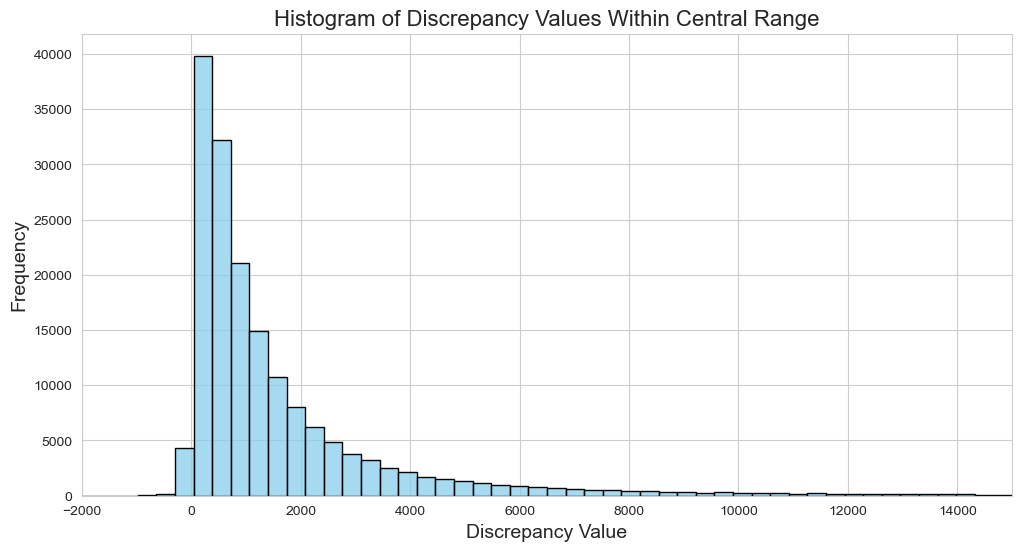

In [68]:
# Visualizing

import seaborn as sns

# Range in the chart, to know how it will look like, will be used in plt.xlim
central_range = (-2000, 15000)

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the histogram using seaborn for a more polished look
plt.figure(figsize=(12,6))
sns.histplot(inventory['Discrepancy_Value'], bins=50, kde=False, color='skyblue', edgecolor='black', binrange=central_range)

# Additional visual improvements can be made here
plt.title('Histogram of Discrepancy Values Within Central Range', fontsize=16)
plt.xlabel('Discrepancy Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(central_range) # Ensures the x-axis only shows the central range

# Show the plot with seaborn's improved visuals
plt.show()

# Will show majority 40k occurences in the first bin and then gradually lowers, from seaborn details cant be seen. Negative values are also present. 
# Overall shows lowers down slowly

In [74]:
# As seaborn has limitiations, where we can't see the values, so will use bokeh

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import layout

# Enable play display in Jupyter notebook
output_notebook()

# Assuming 'inventory' DataFrame is already loaded and 'Discrepancy_Value' is correctly formatted.
central_range = (-2000, 15000)

# Create a histogram with fixed bins
hist, edges = np.histogram(inventory['Discrepancy_Value'], bins=50, range=central_range)

# Create a ColumnDataSource from the histogram data
source = ColumnDataSource(data=dict(top=hist, left=edges[:-1], right=edges[1:]))

# Create a new figure
p = figure(title='Histogram of Discrepancy Values Within Central Range',
           x_axis_label='Discrepancy Value',
           y_axis_label='Frequency',
           background_fill_color="#fafafa")

# Add a quad glyph with source this time
p.quad(top='top', bottom=0, left='left', right='right', source=source,
       fill_color='skyblue', line_color='black', hover_fill_alpha=0.7, hover_fill_color='navy')

# Add hover tool
hover = HoverTool(tooltips=[('Discrepancy Value', '@left{0,0} - @right{0,0}'),
                            ('Frequency', '@top')],
                  mode='vline')
p.add_tools(hover)

# Show the plot
show(p)

# Same type of chart. Can now see the values by hovering.
# Can see Discrepancy value is 40 - 380, and 39k cases

Loading BokehJS ...

In [76]:
# Identify the top 5 products with positive discrepancy value
top_positive_discrepancies = inventory[inventory['Discrepancy_Value'] > 0].sort_values(by='Discrepancy_Value', ascending=False).head(5)
positive_detailed_view = top_positive_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City_end', 'Discrepancy', 'Discrepancy_Value_Dollars']]

# Identify the top 5 products with negative discrepancy value
top_negative_discrepancies = inventory[inventory['Discrepancy_Value'] < 0].sort_values(by='Discrepancy_Value').head(5)
negative_detailed_view = top_negative_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City_end', 'Discrepancy', 'Discrepancy_Value_Dollars']]

# Print the results
print("Top 5 Products with Positive Discrepancy Value:")
positive_detailed_view

# Can see if there is alot of money involved

Top 5 Products with Positive Discrepancy Value:


,InventoryId,Description,Store,Brand,City_end,Discrepancy,Discrepancy_Value_Dollars
128888,50_MOUNTMEND_1233,Jack Daniels No 7 Black,50,1233,MOUNTMEND,8428.0,"$294,895.72"
234469,76_DONCASTER_3405,Tito's Handmade Vodka,76,3405,DONCASTER,9542.0,"$276,622.58"
135694,50_MOUNTMEND_8068,Absolut 80 Proof,50,8068,MOUNTMEND,9285.0,"$218,104.65"
78245,34_PITMERDEN_3545,Ketel One Vodka,34,3545,PITMERDEN,7119.0,"$213,498.81"
234601,76_DONCASTER_3545,Ketel One Vodka,76,3545,DONCASTER,7100.0,"$212,929.00"


In [78]:
print("Top 5 Products with Negative Discrepancy Value:")
negative_detailed_view

Top 5 Products with Negative Discrepancy Value:


,InventoryId,Description,Store,Brand,City_end,Discrepancy,Discrepancy_Value_Dollars
191062,67_EANVERNESS_35464,Stags Leap WC Artemis Cab,67,35464,EANVERNESS,-125.0,"$-6,123.75"
184685,66_EANVERNESS_35464,Stags Leap WC Artemis Cab,66,35464,EANVERNESS,-90.0,"$-4,409.10"
130958,50_MOUNTMEND_2209,Pendleton 1910 Rye,50,2209,MOUNTMEND,-222.0,"$-3,993.78"
225996,74_PAENTMARWY_35464,Stags Leap WC Artemis Cab,74,35464,PAENTMARWY,-72.0,"$-3,527.28"
79079,34_PITMERDEN_4225,Goslings Black Seal Rum 80,34,4225,PITMERDEN,-128.0,"$-3,326.72"


Summary of what's happening with the descrepancy
Our discrepancy analysis has provided valuable insights into inventory accuracy and potential operational inefficiencies. For the top 5 products with a
positive discrepancy, where actual inventory is less than expected, it's crucial to investigate discrepancies that may indicate unrecorded sales, stock
losses, or other issues affecting inventory accuracy. Immediate actions should include reviewing sales recording practices, assessing theft or loss, and
evaluating demand forecasting accuracy. Conversely, the top 5 products with a negative discrepancy, where actual inventory exceeds expectations,
suggest potential overstocking or underreporting of sales. For these items, we recommend analyzing purchasing practices, reassessing demand
forecasting, and improving inventory tracking systems. By addressing these discrepancies, the company can improve inventory accuracy, enhance
financial reporting, and optimize stock levels, leading to better operational efficiency and customer satisfaction.

# 7. Recommended Inventory Level
Mathemtical model to predict the recommended level for the inventory to have at the beginning of the year. 
Can inform stakeholder, the optimal level based on historical data on Sales and what happened in the previous years.


In [88]:
# Calculate the total sales volume for each product by choosing top 20 critical products with highest amount of sales
#Take sum of totalSold
sales_volume = inventory.groupby(['InventoryId', 'Description'])['TotalSold'].sum()

# Sort the products based on sales volume and select the top 20
top_20_critical = sales_volume.sort_values(ascending=False).head(20)
print(top_20_critical)

InventoryId          Description                 
1_HARDERSFIELD_8111  Smirnoff 80 Proof               1142.0
10_HORNSEY_8111      Smirnoff 80 Proof               1104.0
34_PITMERDEN_4261    Capt Morgan Spiced Rum          1055.0
53_HILLFAR_8111      Smirnoff 80 Proof                939.0
10_HORNSEY_4157      Smirnoff Green Apple Vodka       927.0
10_HORNSEY_1892      Yukon Jack                       921.0
27_MOUNTMEND_8111    Smirnoff 80 Proof                909.0
10_HORNSEY_5491      Rumpleminze                      905.0
14_BROMWICH_1892     Yukon Jack                       854.0
14_BROMWICH_4261     Capt Morgan Spiced Rum           850.0
34_PITMERDEN_3545    Ketel One Vodka                  843.0
10_HORNSEY_4261      Capt Morgan Spiced Rum           836.0
10_HORNSEY_3606      Smirnoff Raspberry Vodka         821.0
34_PITMERDEN_8111    Smirnoff 80 Proof                812.0
77_TAMWORTH_5111     Dr McGillicuddy's Mentholmnt     811.0
15_WANBORNE_8068     Absolut 80 Proof             

In [92]:
# Extract the Inventory IDs for the top 20 prodcuts
top_20_inventory_ids = top_20_critical.index.get_level_values('InventoryId').tolist()

In [94]:
# Convert 'PODate' and 'ReceivingDate' to datetime objects in pandas
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Convert 'SalesDate' to datetme objects
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

In [96]:
# Retrieve the first InventoryId from your top 20 list
first_inventory_id = top_20_inventory_ids[0]
print("Investigating InventoryId:", first_inventory_id)

# Beginning and Ending Inventory
#Sum onhand_beg when the inventory Id == first_inventory_id in the inventory table
beginning_inventory = inventory[inventory['InventoryId'] == first_inventory_id]['onHand_beg'].sum()
ending_inventory = inventory[inventory['InventoryId'] == first_inventory_id]['onHand_end'].sum()

# Total Sales for the product
total_sales = sales[sales['InventoryId'] == first_inventory_id]['SalesQuantity'].sum()

print(f"Beginning Inventory for {first_inventory_id}: {beginning_inventory}")
print(f"Ending Inventory for {first_inventory_id}: {ending_inventory}")
print(f"Total Sales for {first_inventory_id}: {total_sales}")

# Total Purchases for the product
total_purcases = purchases[purchases['InventoryId'] == first_inventory_id]['Quantity'].sum()
print(f"Total Purchases for {first_inventory_id}: {total_purchases}")


Investigating InventoryId: 1_HARDERSFIELD_8111
Beginning Inventory for 1_HARDERSFIELD_8111: 58.0
Ending Inventory for 1_HARDERSFIELD_8111: 417.0
Total Sales for 1_HARDERSFIELD_8111: 1142
Total Purchases for 1_HARDERSFIELD_8111: 120


In [98]:
# Average daily sales for the 20 products

# Calculate the total sales period for each product. 
# Calculate total number of days in dataset, check the first date and last date. In days
total_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days

# Calculate the average daily sales for the top 20 products
# Group by top 20 InverotryIds, by which we will get the SalesQuantity and we will sum SalesQuantity
# ads = Average Daily Sales
ads = sales[sales['InventoryId'].isin(top_20_inventory_ids)].groupby('InventoryId')['SalesQuantity'].sum() / total_days

print("Average Daily Sales for Top 20 Products: ")
print(ads)


Average Daily Sales for Top 20 Products: 
InventoryId
10_HORNSEY_1892        15.610169
10_HORNSEY_3606        13.915254
10_HORNSEY_4135        12.932203
10_HORNSEY_4157        15.711864
10_HORNSEY_4261        14.169492
10_HORNSEY_5491        15.338983
10_HORNSEY_8053        13.288136
10_HORNSEY_8111        18.711864
14_BROMWICH_1892       14.474576
14_BROMWICH_4261       14.406780
15_WANBORNE_8068       13.728814
1_HARDERSFIELD_3609    13.169492
1_HARDERSFIELD_8111    19.355932
27_MOUNTMEND_1892      13.491525
27_MOUNTMEND_8111      15.406780
34_PITMERDEN_3545      14.288136
34_PITMERDEN_4261      17.881356
34_PITMERDEN_8111      13.762712
53_HILLFAR_8111        15.915254
77_TAMWORTH_5111       13.745763
Name: SalesQuantity, dtype: float64


In [102]:
# Lead time is difference when we purchased and when we received it

# Calculate lead time for each purchase, convert into dats
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Calculate the average lead time for the top 20 products
# Group Invernetory Ids and caukculate the LeadTime 
average_lt = purchases[purchases['InventoryId'].isin(top_20_inventory_ids)].groupby('InventoryId')['LeadTime'].mean()

print("Average Lead Time for Top 20 Products:")
print(average_lt)

# Takes an average 8days for a product to be delivered to us after the purchase

Average Lead Time for Top 20 Products:
InventoryId
10_HORNSEY_1892        8.105263
10_HORNSEY_3606        8.258621
10_HORNSEY_4135        7.900000
10_HORNSEY_4157        7.963636
10_HORNSEY_4261        7.676190
10_HORNSEY_5491        7.939394
10_HORNSEY_8053        8.152778
10_HORNSEY_8111        7.961538
14_BROMWICH_1892       6.492063
14_BROMWICH_4261       6.612903
15_WANBORNE_8068       7.339623
1_HARDERSFIELD_3609    7.869565
1_HARDERSFIELD_8111    8.317460
27_MOUNTMEND_1892      7.658228
27_MOUNTMEND_8111      7.597938
34_PITMERDEN_3545      6.971154
34_PITMERDEN_4261      6.990909
34_PITMERDEN_8111      7.275510
53_HILLFAR_8111        7.656863
77_TAMWORTH_5111       7.629213
Name: LeadTime, dtype: float64


In [105]:
print("Verifying Data Availability for Top 20 Products: ")
print("ADS Available for: ", ads.index.tolist())
print("Lead Time Available for: ", average_lt.index.tolist())

Verifying Data Availability for Top 20 Products: 
ADS Available for:  ['10_HORNSEY_1892', '10_HORNSEY_3606', '10_HORNSEY_4135', '10_HORNSEY_4157', '10_HORNSEY_4261', '10_HORNSEY_5491', '10_HORNSEY_8053', '10_HORNSEY_8111', '14_BROMWICH_1892', '14_BROMWICH_4261', '15_WANBORNE_8068', '1_HARDERSFIELD_3609', '1_HARDERSFIELD_8111', '27_MOUNTMEND_1892', '27_MOUNTMEND_8111', '34_PITMERDEN_3545', '34_PITMERDEN_4261', '34_PITMERDEN_8111', '53_HILLFAR_8111', '77_TAMWORTH_5111']
Lead Time Available for:  ['10_HORNSEY_1892', '10_HORNSEY_3606', '10_HORNSEY_4135', '10_HORNSEY_4157', '10_HORNSEY_4261', '10_HORNSEY_5491', '10_HORNSEY_8053', '10_HORNSEY_8111', '14_BROMWICH_1892', '14_BROMWICH_4261', '15_WANBORNE_8068', '1_HARDERSFIELD_3609', '1_HARDERSFIELD_8111', '27_MOUNTMEND_1892', '27_MOUNTMEND_8111', '34_PITMERDEN_3545', '34_PITMERDEN_4261', '34_PITMERDEN_8111', '53_HILLFAR_8111', '77_TAMWORTH_5111']


In [111]:
# Calculating the Recommended stock levels wrt ROP

# Initialize a list to store the results
results = []

# Loop through each top 20 InventoryId
for inventory_id in top_20_inventory_ids:
    # Retrieve the average daily sales and lead time for the product
    # Index table
    product_ads = ads.loc[inventory_id] if inventory_id in ads.index else 0
    product_lt = average_lt.loc[inventory_id] if inventory_id in average_lt.index else 0

    # Calculate the Reorder Point (ROP) without safety stock
    # Concept in Inventory Management. Inventory lvl at which order must be placed, to add more stock before it runs out
    # If ROP reaches 10 order more stock Safety Stock
    product_rop = product_ads * product_lt

    # Append the result to the list
    results.append({'InventoryId': inventory_id, 'Reorder Point': product_rop})

# Convert the list to a DataFrame
recommended_stock_levels = pd.DataFrame(results)

# Print the recommended stock levels for the top 20 products
print("Recommended Stock Levels for Top 20 Products: ")
print(recommended_stock_levels)


Recommended Stock Levels for Top 20 Products: 
            InventoryId  Reorder Point
0   1_HARDERSFIELD_8111     160.992198
1       10_HORNSEY_8111     148.975228
2     34_PITMERDEN_4261     125.006934
3       53_HILLFAR_8111     121.860917
4       10_HORNSEY_4157     125.123575
5       10_HORNSEY_1892     126.524532
6     27_MOUNTMEND_8111     117.059759
7       10_HORNSEY_5491     121.782229
8      14_BROMWICH_1892      93.969868
9      14_BROMWICH_4261      95.270640
10    34_PITMERDEN_3545      99.604791
11      10_HORNSEY_4261     108.767716
12      10_HORNSEY_3606     114.920807
13    34_PITMERDEN_8111     100.130751
14     77_TAMWORTH_5111     104.869358
15     15_WANBORNE_8068     100.764311
16    27_MOUNTMEND_1892     103.321176
17      10_HORNSEY_8053     108.335217
18  1_HARDERSFIELD_3609     103.638172
19      10_HORNSEY_4135     102.164407


In [113]:
# Merge the Recommended Reorder Points with the actual ending inventory from the inventory DataFrame
# Taking everything from recommended_stock_levels and do a left join. Will join InventoryIf and onHand_end which is the qty we have at end of period and join on InventoryId
comparison = recommended_stock_levels.merge(inventory[['InventoryId', 'onHand_end']], on='InventoryId',how='left')

# Calculate the difference between the Reorder Point and the actual ending inventory
comparison['Difference'] = comparison['onHand_end'] - comparison['Reorder Point']

# Display the results
print("Comparison of Reorder Point with Actual Ending Inventory: ")
print(comparison[['InventoryId', 'Reorder Point', 'onHand_end', 'Difference']])

Comparison of Reorder Point with Actual Ending Inventory: 
            InventoryId  Reorder Point  onHand_end  Difference
0   1_HARDERSFIELD_8111     160.992198       417.0  256.007802
1       10_HORNSEY_8111     148.975228       424.0  275.024772
2     34_PITMERDEN_4261     125.006934       612.0  486.993066
3       53_HILLFAR_8111     121.860917      1066.0  944.139083
4       10_HORNSEY_4157     125.123575       212.0   86.876425
5       10_HORNSEY_1892     126.524532       110.0  -16.524532
6     27_MOUNTMEND_8111     117.059759       269.0  151.940241
7       10_HORNSEY_5491     121.782229       296.0  174.217771
8      14_BROMWICH_1892      93.969868       283.0  189.030132
9      14_BROMWICH_4261      95.270640        71.0  -24.270640
10    34_PITMERDEN_3545      99.604791       853.0  753.395209
11      10_HORNSEY_4261     108.767716       223.0  114.232284
12      10_HORNSEY_3606     114.920807       141.0   26.079193
13    34_PITMERDEN_8111     100.130751       133.0   32.869

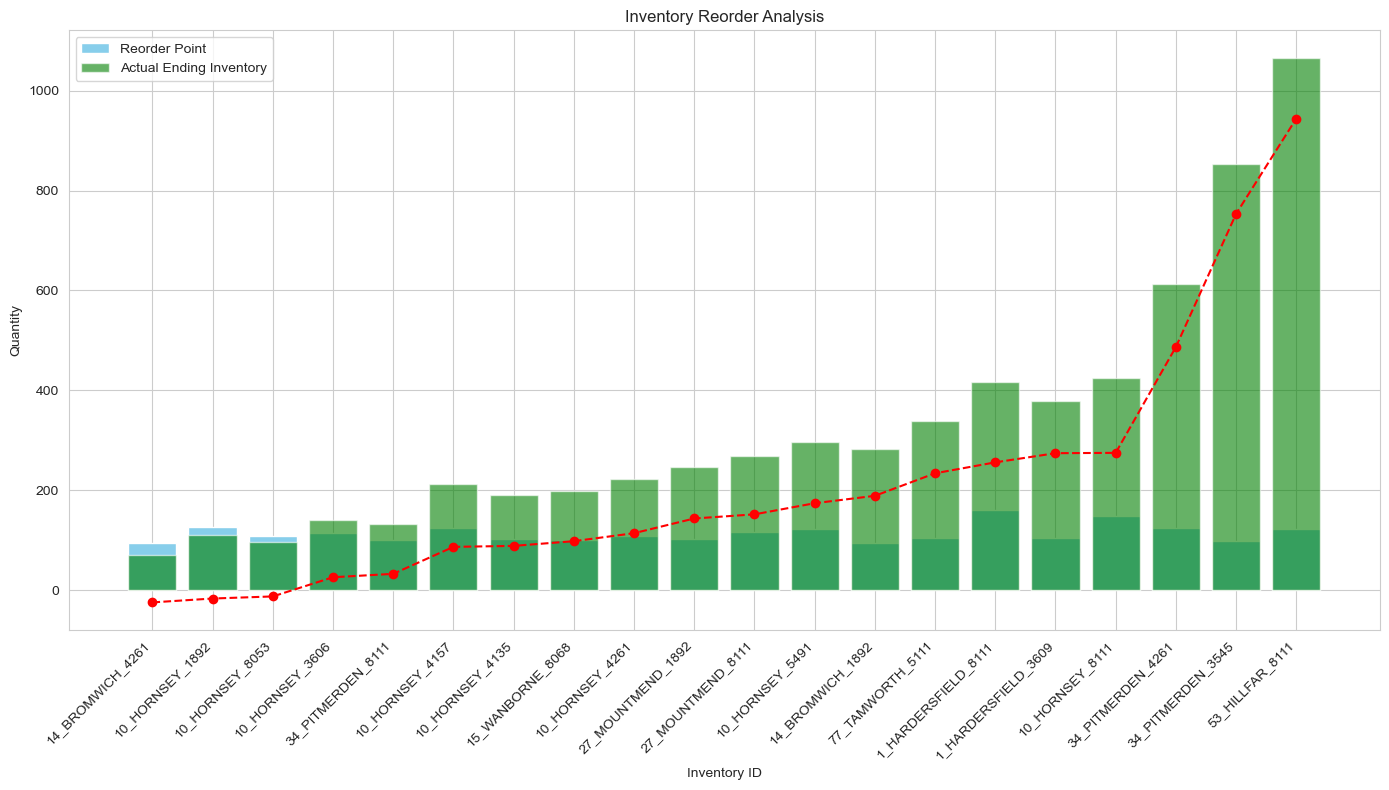

In [119]:
# Visuals
# Assuming 'Comparison' is the DataFrame from the previos step
# Sort the values based on the difference for better visualization
comparison_sorted = comparison.sort_values('Difference')

# Plotting
plt.figure(figsize=(14, 8))

# Reorder Point
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['Reorder Point'], color="skyblue", label='Reorder Point')

# Actual Ending Inventory
plt.bar(comparison_sorted['InventoryId'],  comparison_sorted['onHand_end'], color="green", alpha=0.6, label='Actual Ending Inventory')

# Overlay Difference as a line for clarity
plt.plot(comparison_sorted['InventoryId'],  comparison_sorted['Difference'], color="red", marker='o', linestyle='dashed')

# Labels and Title
plt.xlabel('Inventory ID')
plt.ylabel('Quantity')
plt.title('Inventory Reorder Analysis')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [121]:
# Abvoe we identified the 3 products that req reorder as at risk
# Qty to reorder will be recommended now

# Ensure the 'SalesDate' and 'ReceivingDate' are in datetime format for accurate calculation
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Calculate total sales days for ADS calculation (assuming a year of sales data)
# Time frame for the sales
total_sales_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days

# Assuming a holding cost as a percentage of the unit cost (e.g., 25%)
# 100$ product, assume $24 is the holding cost
holding_cost_percentage = 0.25

# Estimated order cost (S) - Adjust this value based on your actual order costs
# To order an item will cost
order_cost_per_order = 50

# Identify the products from the top 20 that have an actual ending inventory lower than the reorder point. (First 3, we need to reorder)
products_to_reorder = comparison[comparison['Difference'] < 0 ]

# Filter the sales and purchases data for the top 20 products requiring reorder
sales_top20 = sales[sales['InventoryId'].isin(products_to_reorder['InventoryId'])]
purchases_top20 = purchases[purchases['InventoryId'].isin(products_to_reorder['InventoryId'])]

# Calculate the average unit cost and annual demand for these products
average_unit_cost = purchases_top20.groupby('InventoryId')['PurchasePrice'].mean()
annual_demand = sales_top20.groupby('InventoryId')['SalesQuantity'].sum()

# Calculate holding cost per unit
holding_cost_per_unit = average_unit_cost * holding_cost_percentage

# Function to calculate the Economic Order Quantity EOQ. As there will be warehouse cost
def calculate_eoq(demand, order_cost, holding_cost):
    if demand > 0 and holding_cost > 0:
        return np.sqrt((2 * demand * order_cost) / holding_cost)
    else:
        return 0

# Calculate EOQ for each of the top 20 products needing reorder
eoq_values = {}
for inventory_id in products_to_reorder['InventoryId']:
    demand = annual_demand.get(inventory_id, 0)
    holding_cost = holding_cost_per_unit.get(inventory_id, 0)
    eoq = calculate_eoq(demand, order_cost_per_order, holding_cost)
    eoq_values[inventory_id] = eoq

# Convert the EOQ results to a DataFrame for display
eoq_df = pd.DataFrame(list(eoq_values.items()), columns=['InventoryId', 'EOQ'])

print("EOQ for Top 20 Products Needing Reorder:")
print(eoq_df)

EOQ for Top 20 Products Needing Reorder:
        InventoryId         EOQ
0   10_HORNSEY_1892  715.308791
1  14_BROMWICH_4261  145.005491
2   10_HORNSEY_8053  646.632301
